# SLICE Eddy Dataset v3
The previous versions of the 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import skimage
from rasterio.transform import from_origin
from PIL import Image

In [33]:
%matplotlib inline

In [74]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

def create_synthetic_sar_image_geotiff(size=(1000, 1000), save_path='synthetic_sar.tif'):
    """
    Create and save a synthetic SAR image with random noise.

    Parameters:
    - size: Tuple of (height, width) for the image dimensions.
    - save_path: Path to save the synthetic GeoTIFF file.
    """
    # Generate random noise that simulates SAR backscatter intensity values
    # Assuming SAR-like range after converting to decibels (dB)
    synthetic_sar = np.random.randn(*size) * 3 + 10  # Mean 10, std 3 dB
    
    # Normalize the values to a more common SAR range and ensure non-negative
    synthetic_sar_normalized = np.clip(synthetic_sar, 0, None)

    # Define basic geospatial metadata
    transform = from_origin(0, 0, 1, 1)  # Placeholder, not geographically accurate
    crs = "EPSG:4326"  # Placeholder CRS

    # Save as a single-band GeoTIFF
    with rasterio.open(
        save_path, 'w', driver='GTiff',
        height=size[0], width=size[1],
        count=1, dtype='float32',
        crs=crs, transform=transform,
    ) as dst:
        dst.write(synthetic_sar_normalized.astype('float32'), 1)

# Example usage
create_synthetic_sar_image_geotiff()


[[ 6.7282124  8.457311  11.420101  ...  9.219633  10.832826  12.477696 ]
 [12.145266  10.798369   7.549837  ...  7.097239   8.279084   9.368787 ]
 [13.761952   8.343306  13.740159  ... 10.309093  16.169096  10.546012 ]
 ...
 [12.943431   6.966603  11.616847  ...  7.3277435  5.7071733  9.023787 ]
 [11.303386  10.290914  16.347725  ... 11.321683   5.952456  12.981558 ]
 [11.615217  11.8398695 10.97331   ... 14.160273   9.44673    9.755474 ]]


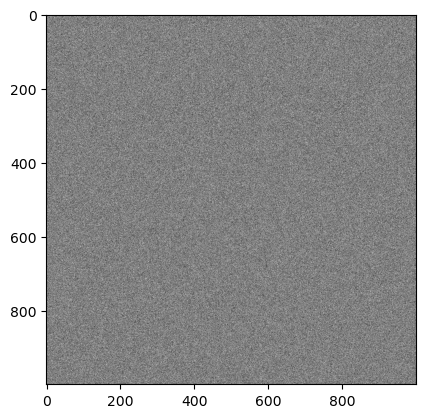

In [75]:
plt.imshow(geotiff2img('synthetic_sar.tif'), cmap='gray', vmin=0, vmax=1)

(99, 66) (99, 66)
(84, 84) (84, 84)
(99, 55) (99, 55)
(83, 83) (83, 83)
(53, 53) (53, 53)
(77, 77) (77, 77)
(87, 87) (87, 87)
(74, 74) (74, 74)
(99, 99) (99, 99)
(66, 66) (66, 66)
(60, 60) (60, 60)
(53, 53) (53, 53)
(96, 96) (96, 96)
(91, 91) (91, 91)
(50, 50) (50, 50)
(88, 88) (88, 88)
(91, 91) (91, 91)
(64, 64) (64, 64)
(59, 59) (59, 59)
(65, 65) (65, 65)
(90, 90) (90, 90)


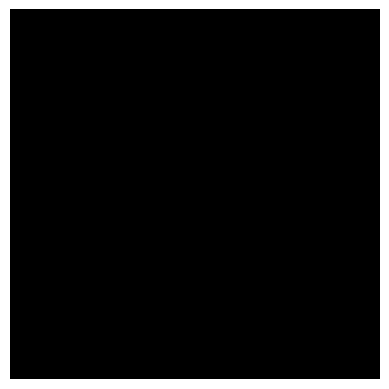

In [37]:
create_synthetic_sar_image_geotiff()

In [77]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import os
from multiprocessing import Pool, cpu_count

def create_synthetic_sar_image_geotiff(index, size=(1000, 1000), output_dir='/work/08452/kaipak/ls6/datasets/synthetic_sar'):
    """
    Generate a synthetic SAR image and save as GeoTIFF.

    Parameters:
    - index: An index number for the image file name.
    - size: Tuple for the image dimensions (height, width).
    - output_dir: Directory to save the GeoTIFF files.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    save_path = os.path.join(output_dir, f'synthetic_sar_{index:05d}.tif')
    
    # Generate random noise simulating SAR backscatter intensity values
    synthetic_sar = np.random.randn(*size) * 3 + 10  # Adjust mean and std as needed
    
    # Normalize and ensure non-negative values
    synthetic_sar_normalized = np.clip(synthetic_sar, 0, None)

    # Define basic geospatial metadata
    transform = from_origin(0, 0, 1, 1)  # Not geographically accurate
    crs = "EPSG:4326"  # Placeholder CRS

    # Save as GeoTIFF
    with rasterio.open(
        save_path, 'w', driver='GTiff',
        height=size[0], width=size[1],
        count=1, dtype='float32',
        crs=crs, transform=transform,
    ) as dst:
        dst.write(synthetic_sar_normalized.astype('float32'), 1)

def worker_wrapper(args):
    """Wrapper function for multiprocessing."""
    return create_synthetic_sar_image_geotiff(*args)

def generate_images_parallel(num_images=10000):
    """
    Generate multiple synthetic SAR images in parallel.

    Parameters:
    - num_images: The total number of synthetic images to generate.
    """
    # Determine the number of processes based on available CPUs
    num_processes = min(cpu_count(), num_images)

    # Create arguments list for each image generation task
    args_list = [(i, (1000, 1000), 'synthetic_sar_images') for i in range(num_images)]

    # Use a multiprocessing pool to generate images in parallel
    with Pool(processes=num_processes) as pool:
        results = pool.map(worker_wrapper, args_list)




In [78]:
generate_images_parallel(num_images=10000)

/work/08452/kaipak/ls6/mambaforge/envs/google_earth_engine/lib/python3.11/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/work/08452/kaipak/ls6/mambaforge/envs/google_earth_engine/lib/python3.11/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/work/08452/kaipak/ls6/mambaforge/envs/google_earth_engine/lib/python3.11/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. T